# 波士顿房屋数据

In [1]:
import pandas as pd
from sklearn import datasets as ds
boston = ds.load_boston()
df = pd.DataFrame(data=boston.data)
df.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
df['MEDV']=boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid',context='notebook')
cols=['LSTAT','INDUS','NOX','RM','MEDV']
sns.pairplot(df[cols],height=2.5)
plt.show()
#sns.reset_orig()重设matplotlib风格

<Figure size 1250x1250 with 30 Axes>

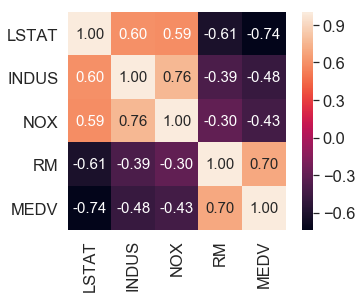

In [3]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm =sns.heatmap(cm,cbar=True,annot=True,square=True,
                fmt='.2f',annot_kws={'size':15},
                yticklabels=cols,xticklabels=cols)
plt.show()

# 最小二乘法-梯度下降

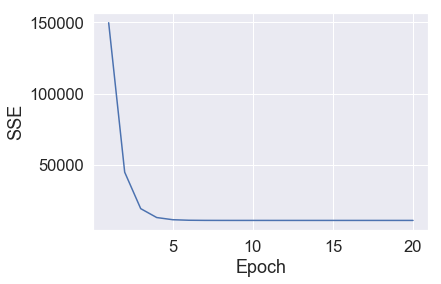

In [29]:
class LinearRegressionGD(object):
    def __init__(self,eta=0.001,n_iter=20):
        '''初始化超参'''
        self.eta=eta#学习速率
        self.n_iter=n_iter#迭代次数
        
    def fit(self,X,y):
        '''训练模型'''
        self.w_ = np.zeros(1+X.shape[1])#初始化W权重
        self.cost_=[]#存储损失函数值
        
        for i in range(self.n_iter):
            '''梯度下降'''
            output = self.net_input(X)
            errors = (y-output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self,X):
        '''计算Y值'''
        return np.dot(X,self.w_[1:]) +self.w_[0]
    
    def predict(self,X):
        return self.net_input(X)
    
X = df[['RM']].values
y = df['MEDV'].values

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_std = sc_x.fit_transform(X)
lr = LinearRegressionGD()
lr.fit(X_std,y)

#迭代次数与损失函数的关系
plt.plot(range(1,lr.n_iter+1),lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

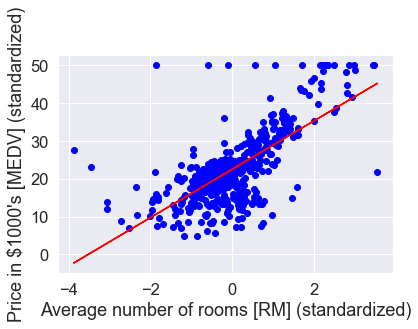

In [32]:
def lin_regplot(X,y,model):
    plt.scatter(X,y,c='blue')
    plt.plot(X,model.predict(X),color='red')
    return None

lin_regplot(X_std,y,lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000\'s [MEDV] (standardized)')
plt.show()

In [38]:
num_rooms_std = sc_x.transform([[5.0]])
price_std = lr.predict(num_rooms_std)
print("Price in $1000's: %.3f" % (price_std))
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Price in $1000's: 10.840
Slope: 6.389
Intercept: 22.533


# 最小二乘法-sklearn

Slope: 9.102
Intercept: -34.671


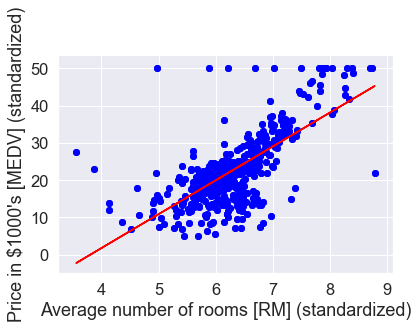

In [43]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X,y)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)
lin_regplot(X,y,slr)
lin_regplot(X,y,slr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000\'s [MEDV] (standardized)')
plt.show()